# Training model

By: Javier Martínez

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                             accuracy_score,precision_score,recall_score, roc_curve, auc)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

Data Base

In [2]:
pd_MeLi_ = pd.read_pickle('./data/data_base.pkl')
pd_MeLi = pd_MeLi_.set_index('id',drop=True).copy()

In [3]:
pd_MeLi['title_new'] = pd_MeLi['title'].apply(lambda x : 1 if (x.upper().find('NUEV')>0 ) or\
                                                              (x.upper().find('NEW')>0  ) 
                                                            else 0)

pd_MeLi['title_used'] = pd_MeLi['title'].apply(lambda x : 1 if (x.upper().find('USAD')>0  ) or\
                                                               (x.upper().find('ANTIGU')>0) or\
                                                               (x.upper().find('VIEJ')>0  )\
                                                            else 0 )

In [4]:
all_features = ['buying_mode',	#str** no ayuda mucho
                #'seller_address_country',	#str
                'seller_address_state',	#str
                #'seller_address_city',	#str
                'status', #str **
                #'title', #str
                'listing_type_id', # puede ser
                #'category_id', #str
                #'currency_id', #str	
                #'tags_no_list',
                'mode',#str ** no ayuda mucho

                # Boleanos
                'accepts_mercadopago',	# boolean** algo
                'automatic_relist',	# boleano**algo
                'training_data', # boleano#=======
                'local_pick_up', #boleano**algo
                'free_shipping',#boleano**algo
                'condition_new',	#boleano #=======
                'title_new',
                'title_used',
                # 'MLAAM', # mas aporta
                # 'MLABC',	
                # 'MLACD',	
                # 'MLADC',	
                # 'MLAMC',	
                # 'MLAMO',	
                # 'MLAMP',
                # 'MLAMS',	
                # 'MLAOT',
                # 'MLATB',	
                # 'MLAVE',
                # 'MLAVS',	
                # 'MLAWC',	
                # 'MLAWT',

                # Numero
                'sold_quantity',	# entero algo
                'base_price',	#numero** **nada
                #'price', #numero ** **nada
                #'seller_id',	#int
                'initial_quantity', # entero **
                'available_quantity',	# entero ** elimina
        ]


pd_model = pd_MeLi[all_features].copy()

In [5]:
dummies = ['buying_mode',	#str**
            #'seller_address_country',	#str
            'seller_address_state',	#str
            #'seller_address_city',	#str
            'status', #str **
            #'title', #str
            'listing_type_id',	#str
            #'category_id', #str
            #'currency_id', #str	
            #'tags_no_list',
            'mode',#str **
            ]

pd_x_data = pd.get_dummies(pd_model,columns=dummies)

In [6]:
numbers = [ 'sold_quantity',	# entero
            'base_price',	#numero**
            #'price', #numero **
            #'seller_id',	#int
            'initial_quantity', # entero **
            'available_quantity',	# entero **
            ]

scaler = MinMaxScaler()
scaler.fit(pd_x_data[numbers])

MinMaxScaler()

In [7]:
pd_x_data[numbers] = scaler.transform(pd_x_data[numbers])

In [8]:
out = 'condition_new'

Data for Model

In [9]:
# Training data
pandas_x_training = pd_x_data.query('training_data==1').copy().fillna(0).astype(float)
pandas_y_training = pandas_x_training[out].astype(int)
pandas_x_training.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_training.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,title_new,title_used,sold_quantity,base_price,initial_quantity,available_quantity,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA4695330653,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.562200e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MLA7160447179,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.192122e-06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
MLA7367189936,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.662200e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
pandas_x_training.shape[0]

90000

In [11]:
# Test Data
pandas_x_test = pd_x_data.query('training_data==0').copy().fillna(0).astype(float)
pandas_y_test = pandas_x_test[[out]].astype(int)
pandas_x_test.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_test.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,title_new,title_used,sold_quantity,base_price,initial_quantity,available_quantity,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA9379759063,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.014622e-06,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
MLA8701321701,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.317200e-08,0.0018,0.0018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MLA7219741922,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.021220e-07,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
pandas_x_test.shape[0]

10000

Training Models

In [13]:

class DecisionTree_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,criterion='gini', splitter='best', max_depth=None):

        np.random.seed(10)
        # Model
        self.model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'criterion':criterion,
                                    'splitter':splitter,
                                    'max_depth':max_depth
                                    },index=[0])
                                    
    @staticmethod
    def select_model(criterion='gini', splitter='best', max_depth=None):

        model = DecisionTree_MODEL(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training(criterion=criterion, splitter=splitter, max_depth=max_depth)
        return model

In [14]:

class RandomForestClassifier_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,n_estimators=100,criterion='gini', max_depth=None):

        np.random.seed(10)
        # Model
        self.model = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, max_depth=max_depth)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'criterion':criterion,
                                    'max_depth':max_depth,
                                    'n_estimators':n_estimators
                                    },index=[0])
                                    
    @staticmethod
    def select_model(n_estimators=100,criterion='gini',max_depth=None):

        model = RandomForestClassifier_MODEL(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training(n_estimators=n_estimators,criterion=criterion, max_depth=max_depth)
        return model

In [15]:
class GradientBoostingClassifier_Model():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,learning_rate,n_estimators):

        np.random.seed(10)
        # Model
        self.model = GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'learning_rate':learning_rate,
                                    'n_estimators':n_estimators
                                    },index=[0])
                                    
    @staticmethod
    def select_model(learning_rate,n_estimators):

        model = GradientBoostingClassifier_Model(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training( learning_rate=learning_rate, n_estimators=n_estimators)
        return model

In [24]:
class XGB_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,n_estimators):

        np.random.seed(7)
        # Model
        self.model = XGBClassifier(n_estimators=n_estimators,
                                   verbosity=0)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'n_estimators':n_estimators},index=[0])

    @staticmethod
    def select_model(n_estimators):

        model = XGB_MODEL(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training( n_estimators=n_estimators)
        return model

In [16]:
# Training models
#models = list(map(lambda x: DecisionTree_MODEL.select_model(criterion='entropy', splitter='best', max_depth=x),[50,100,150,200,250,300,350]))

In [17]:
#models = list(map(lambda x: RandomForestClassifier_MODEL.select_model(n_estimators=x, criterion='entropy', max_depth=None),[50,100,150,200,250,300,350]))

In [18]:
#models = list(map(lambda x: GradientBoostingClassifier_Model.select_model(learning_rate=0.1, n_estimators=x),[50,100,150,200,250,300,350]))

In [27]:
models = list(map(lambda x: XGB_MODEL.select_model(n_estimators=x),[50,100,150,200,250,300,350]))

In [28]:
# Summary models
summary_models = pd.concat(list(map(lambda x: x.summary, models)))
summary_models.round(2)

,accuracy,precision,recall,auc,n_estimators
0,0.85,0.88,0.85,0.85,50
0,0.85,0.88,0.84,0.86,100
0,0.85,0.89,0.84,0.86,150
0,0.85,0.89,0.84,0.86,200
0,0.85,0.89,0.83,0.86,250
0,0.85,0.89,0.83,0.85,300
0,0.85,0.89,0.83,0.85,350


In [29]:
# Best Model
best_model = list(filter(lambda x: x.accuracy == summary_models.accuracy.max(), models))

In [30]:
# Confusion Matrix Best Model
best_model[0].confusion_matrix

array([[3993,  601],
       [ 851, 4555]])

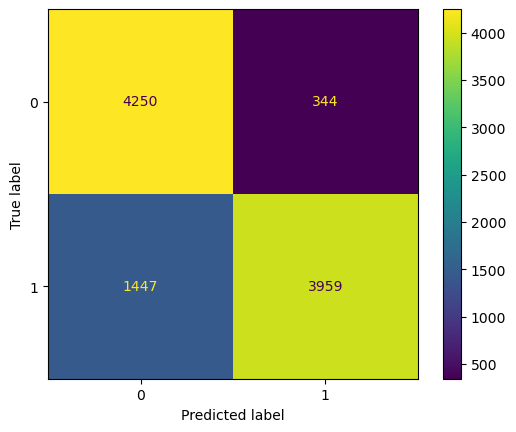

In [22]:
# Confusion Matrix Plot Best Model
best_model[0].plot_matrix.plot()